In [70]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

Random forest accuracy result - RMSE: 271,099 | R²: 0.999


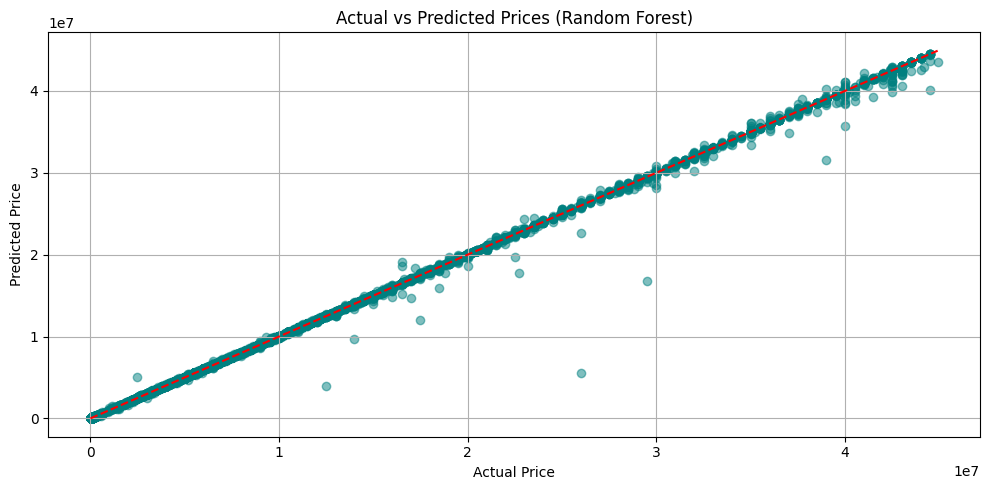

In [81]:
#  Load dataset
df = pd.read_csv("/content/dataset.csv")
# df = pd.read_excel("//content/testing.xlsx")


# Remove unnecessary index column if it exists
if 'Column1' in df.columns:
    df = df.drop(columns=['Column1'])

# Feature Engineering
df['price_per_marla'] = df['price'] / df['Area_in_Marla']
df['total_rooms'] = df['baths'] + df['bedrooms']

#  Define features and target
features = ['property_type', 'location', 'city', 'baths', 'bedrooms', 'Area_in_Marla', 'purpose', 'price_per_marla', 'total_rooms']
target = 'price'

#  Encode categorical variables
categorical_cols = ['property_type', 'location', 'city', 'purpose']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

#  Log transformation for target
df['log_price'] = np.log1p(df[target])

#  Clean data: handle inf/-inf and NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(subset=features + ['log_price'], inplace=True)

#  Split into features and target
X = df[features]
y = df['log_price']

#  Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Random Forest Regressor with improved parameters
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
rf_model.fit(X_train, y_train)

# Predict and reverse log transformation
rf_log_preds = rf_model.predict(X_test)
rf_preds = np.expm1(rf_log_preds)
y_true = np.expm1(y_test)

#  Evaluation
def evaluate(model_name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - RMSE: {rmse:,.0f} | R²: {r2:.3f}")

evaluate("Random forest accuracy result", y_true, rf_preds)

# Plot: Actual vs Predicted
plt.figure(figsize=(10,5))
plt.scatter(y_true, rf_preds, alpha=0.5, color='teal')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices (Random Forest)")
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
plt.grid(True)
plt.tight_layout()
plt.show()


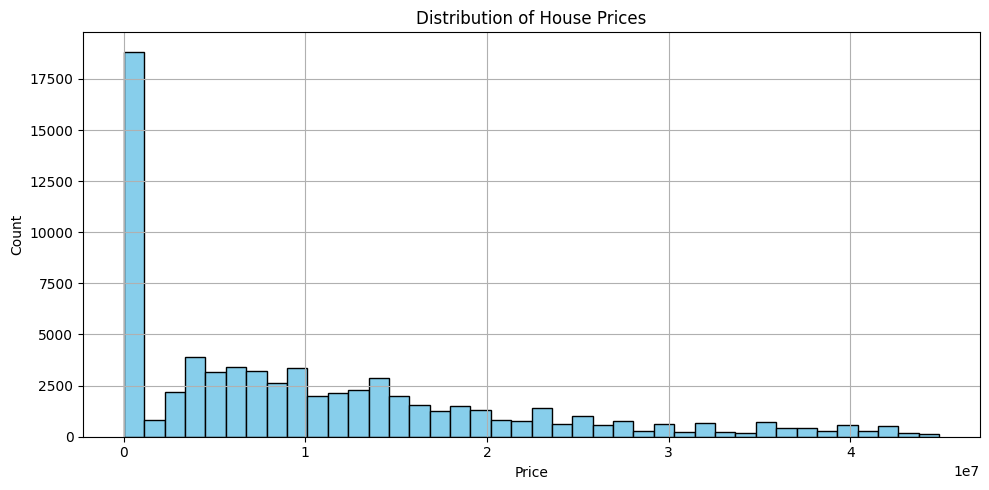

In [82]:
plt.figure(figsize=(10,5))
plt.hist(df['price'], bins=40, color='skyblue', edgecolor='black')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()


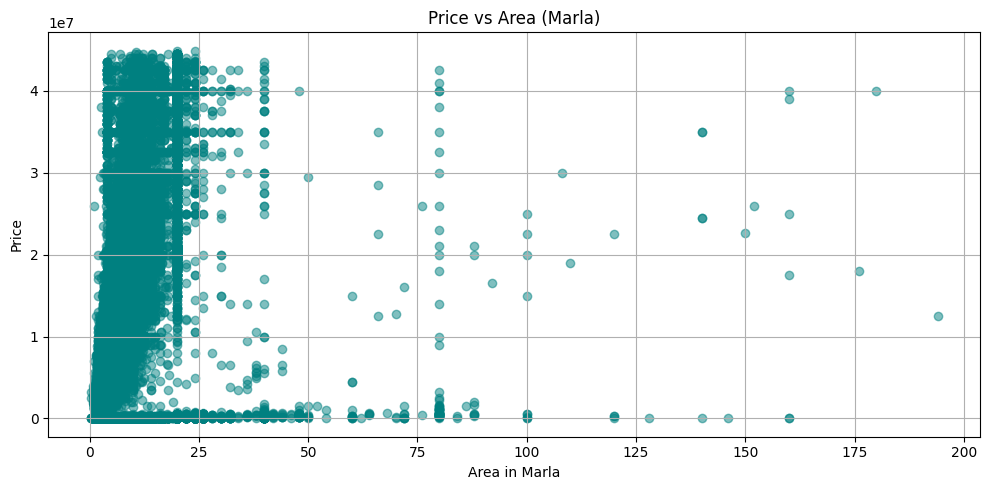

In [74]:
plt.figure(figsize=(10,5))
plt.scatter(df['Area_in_Marla'], df['price'], alpha=0.5, color='teal')
plt.title('Price vs Area (Marla)')
plt.xlabel('Area in Marla')
plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()
plt.show()


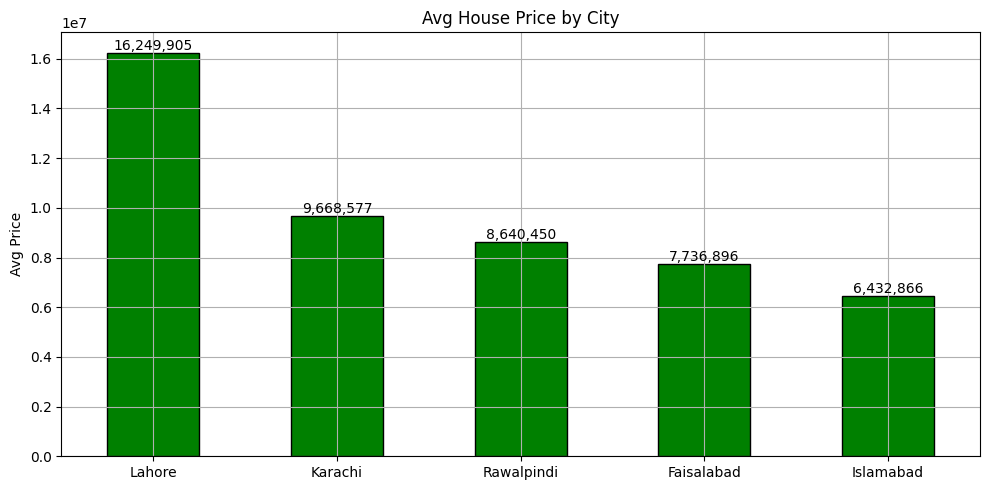

In [87]:
# 📉 Calculate average price by encoded city (after model prep)
avg_price_city = df.groupby('city')['price'].mean()

#  Decode city names using the label encoder
decoded_city_names = label_encoders['city'].inverse_transform(avg_price_city.index)
avg_price_city.index = decoded_city_names

#  Sort by average price (optional for better visual ordering)
avg_price_city = avg_price_city.sort_values(ascending=False)

#  Average House Price by City with readable names
plt.figure(figsize=(10, 5))
avg_price_city.plot(kind='bar', color='green', edgecolor='black')
plt.ylabel('Avg Price')
plt.title('Avg House Price by City')
plt.xticks(rotation=0)  # Rotate labels for better readability
plt.grid(axis='y')
plt.grid(axis='x')

# 🏷️ Add value labels above bars
for i, v in enumerate(avg_price_city):
    plt.text(i, v, f'{v:,.0f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


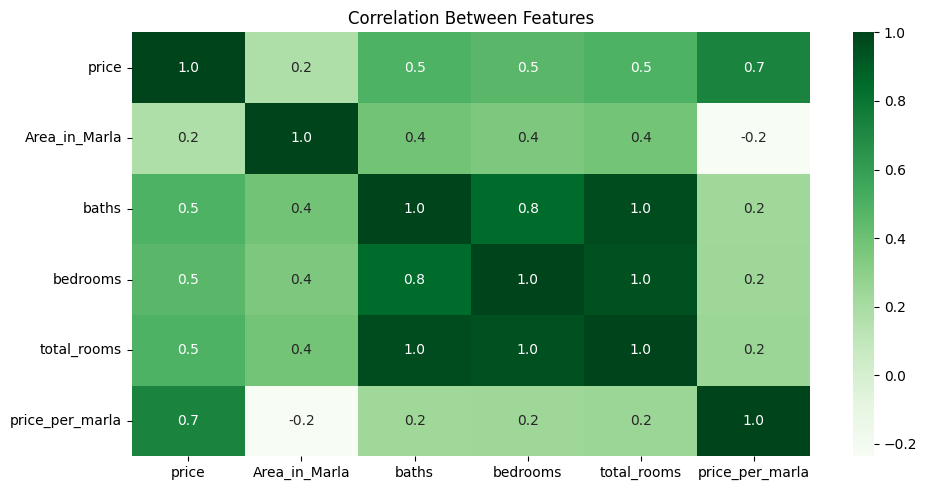

In [55]:
selected_cols = ['price', 'Area_in_Marla', 'baths', 'bedrooms', 'total_rooms', 'price_per_marla']
plt.figure(figsize=(10,5))
sns.heatmap(df[selected_cols].corr(), annot=True, cmap='Greens', fmt=".1f")
plt.title("Correlation Between Features")
plt.tight_layout()
plt.show()
